In [3]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

In [6]:
#훈련데이터와 테스트 데이터의 벡터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
from keras.utils.np_utils import to_categorical
#라벨 데이터를 카테고리 데이터로 전환

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [1]:
#모델 구성

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

#x_test와 label을 이용해서 모델 테스트 및 평가
eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)

Epoch 1/15
16/16 [==============================] - 1s 63ms/step - loss: 0.1149 - accuracy: 0.9587 - val_loss: 1.0103 - val_accuracy: 0.8110
Epoch 2/15
16/16 [==============================] - 2s 95ms/step - loss: 0.1133 - accuracy: 0.9555 - val_loss: 1.0645 - val_accuracy: 0.8010
Epoch 3/15
16/16 [==============================] - 2s 101ms/step - loss: 0.1096 - accuracy: 0.9587 - val_loss: 0.9954 - val_accuracy: 0.8120
Epoch 4/15
16/16 [==============================] - 1s 54ms/step - loss: 0.1081 - accuracy: 0.9560 - val_loss: 1.0078 - val_accuracy: 0.8100
Epoch 5/15
16/16 [==============================] - 1s 55ms/step - loss: 0.1076 - accuracy: 0.9577 - val_loss: 1.1083 - val_accuracy: 0.7960
Epoch 6/15
16/16 [==============================] - 1s 51ms/step - loss: 0.1053 - accuracy: 0.9579 - val_loss: 1.0560 - val_accuracy: 0.8130
Epoch 7/15
16/16 [==============================] - 1s 52ms/step - loss: 0.1030 - accuracy: 0.9587 - val_loss: 1.1034 - val_accuracy: 0.7910
Epoch 8/15
1

In [11]:
import matplotlib.pyplot as plt

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

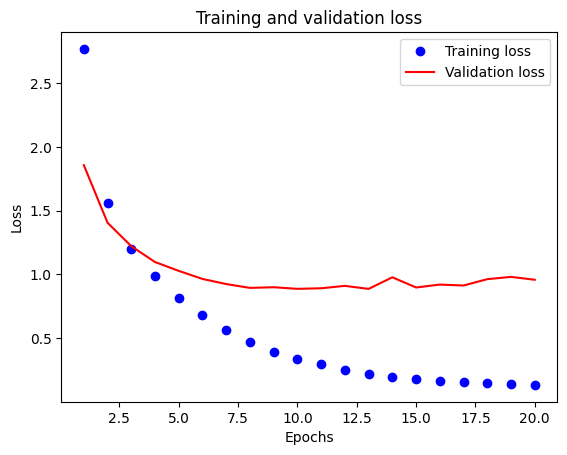

In [13]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'r-', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

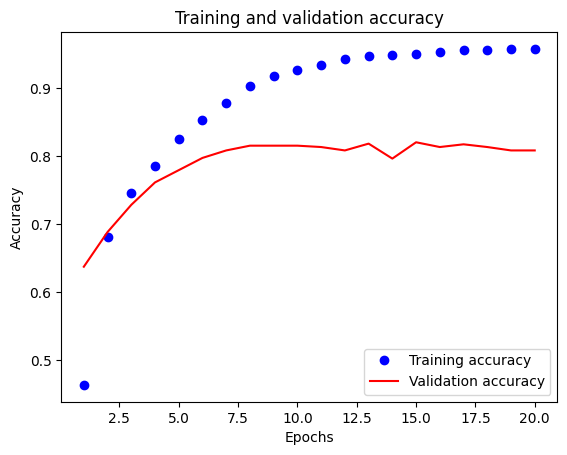

In [15]:
plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'r-', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
#도표를 보고 검증된 결과로 다시 학습(epochs가 15일때 최적)